<a href="https://colab.research.google.com/github/niteshgajakosh/Topic-Modeling-on-News-Articles/blob/main/Topic_Modeling_on_News_Articles_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project your task is to identify major themes/topics across a collection of BBC news articles. You can use clustering algorithms such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) etc.

## <b> Data Description </b>

### The dataset contains a set of news articles for each major segment consisting of business, entertainment, politics, sports and technology. You need to create an aggregate dataset of all the news articles and perform topic modeling on this dataset. Verify whether these topics correspond to the different tags available.

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.metrics import accuracy_score, classification_report
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the dataset
data = pd.read_csv('/content/drive/MyDrive/Datasets/bbc.csv')

# **First Look of Data**

In [4]:
data.head()

,Unnamed: 0,news,type
0,0,Yukos unit buyer faces loan claim\n \n The own...,business
1,1,Ad sales boost Time Warner profit\n \n Quarter...,business
2,2,Dollar gains on Greenspan speech\n \n The doll...,business
3,3,US trade gap hits record in 2004\n \n The gap ...,business
4,4,High fuel prices hit BA's profits\n \n British...,business


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2225 non-null   int64 
 1   news        2225 non-null   object
 2   type        2225 non-null   object
dtypes: int64(1), object(2)
memory usage: 52.3+ KB


In [6]:
data.shape

(2225, 3)

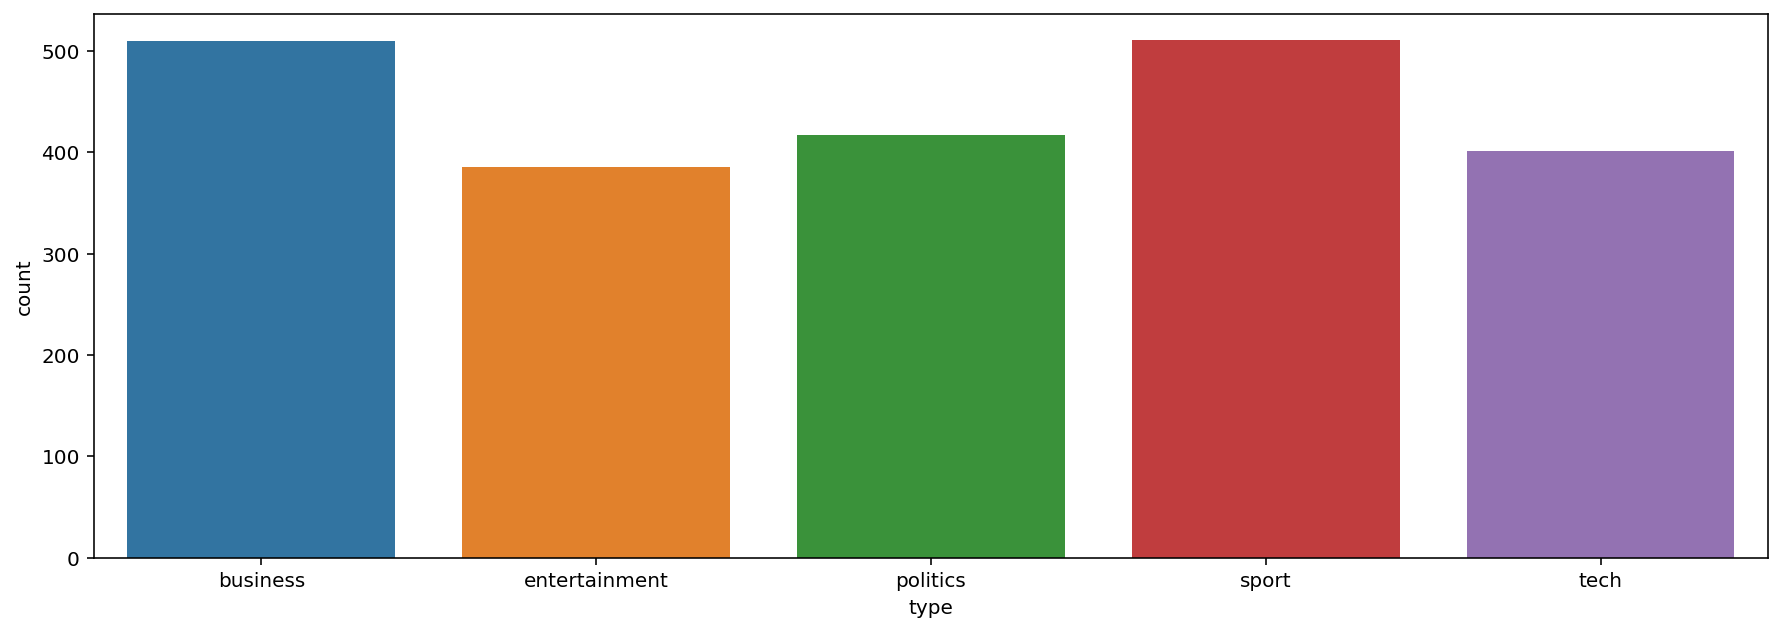

In [7]:
plt.figure(figsize=(15, 5))
sns.countplot(data.type)

In [8]:
data['News_length'] = data['news'].str.len()
print(data['News_length'])

0       1557
1       2569
2       2258
3       1960
4       2411
        ... 
2220    2526
2221    2857
2222    2334
2223    3594
2224    1889
Name: News_length, Length: 2225, dtype: int64


In [9]:
data.head()

,Unnamed: 0,news,type,News_length
0,0,Yukos unit buyer faces loan claim\n \n The own...,business,1557
1,1,Ad sales boost Time Warner profit\n \n Quarter...,business,2569
2,2,Dollar gains on Greenspan speech\n \n The doll...,business,2258
3,3,US trade gap hits record in 2004\n \n The gap ...,business,1960
4,4,High fuel prices hit BA's profits\n \n British...,business,2411


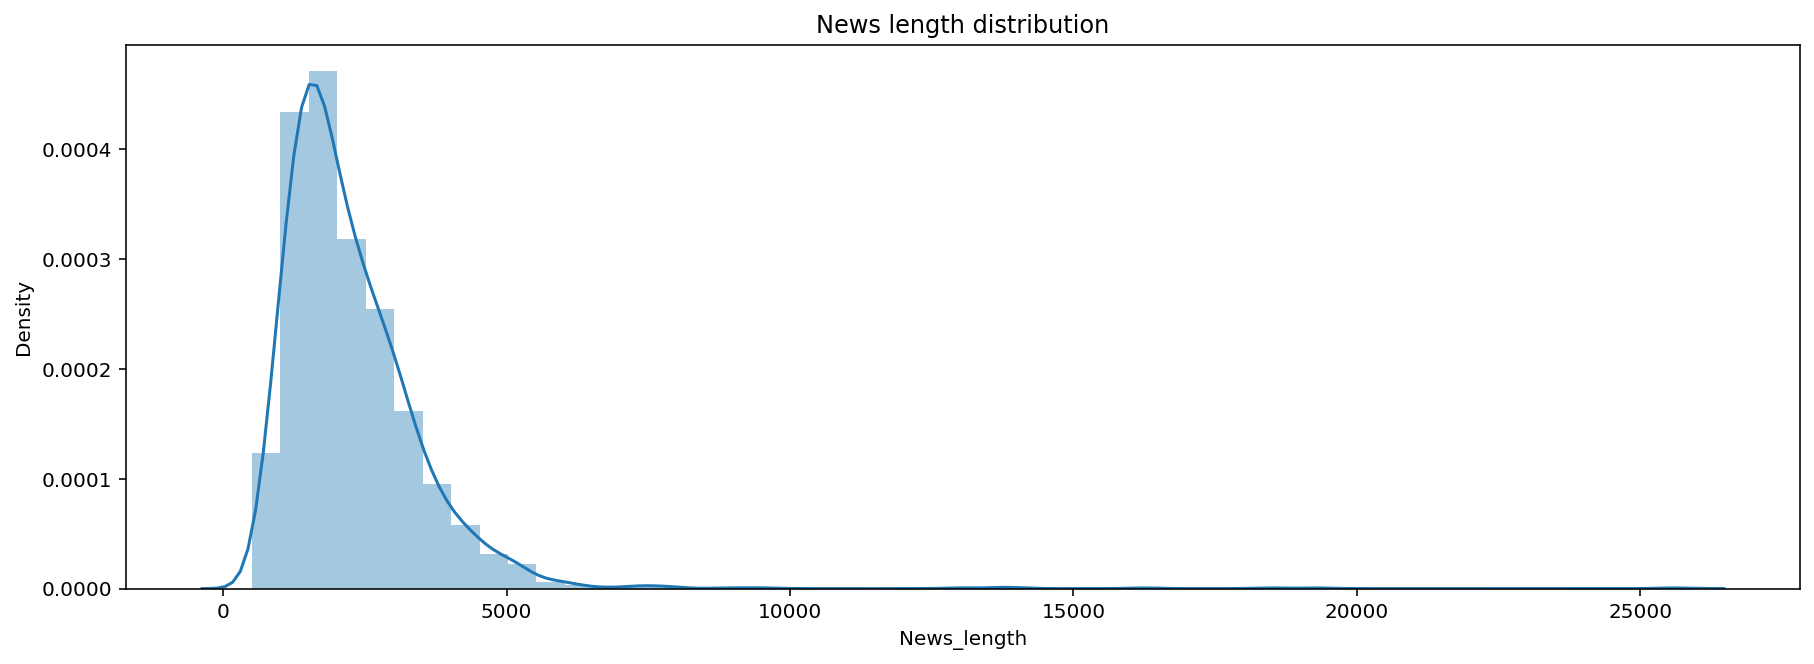

In [10]:
plt.figure(figsize=(15, 5))
sns.distplot(data['News_length']).set_title('News length distribution');

# **Funtion to remove punctuation**

In [11]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [12]:
data['news'] = data['news'].apply(remove_punctuation)
data.head(10)

,Unnamed: 0,news,type,News_length
0,0,Yukos unit buyer faces loan claim\n \n The own...,business,1557
1,1,Ad sales boost Time Warner profit\n \n Quarter...,business,2569
2,2,Dollar gains on Greenspan speech\n \n The doll...,business,2258
3,3,US trade gap hits record in 2004\n \n The gap ...,business,1960
4,4,High fuel prices hit BAs profits\n \n British ...,business,2411
5,5,India widens access to telecoms\n \n India has...,business,1738
6,6,Yukos loses US bankruptcy battle\n \n A judge ...,business,2717
7,7,Ask Jeeves tips online ad revival\n \n Ask Jee...,business,1149
8,8,Indonesians face fuel price rise\n \n Indonesi...,business,1852
9,9,Telegraph newspapers axe 90 jobs\n \n The Dail...,business,2996


# **Removeing Stop Words From Data**

In [13]:
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
sw = stopwords[:]

In [15]:
print("Number of stopwords: ", len(sw))

Number of stopwords:  179


In [16]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [17]:
data['news'] = data['news'].apply(stopwords)
data.head(10)

,Unnamed: 0,news,type,News_length
0,0,yukos unit buyer faces loan claim owners embat...,business,1557
1,1,ad sales boost time warner profit quarterly pr...,business,2569
2,2,dollar gains greenspan speech dollar hit highe...,business,2258
3,3,us trade gap hits record 2004 gap us exports i...,business,1960
4,4,high fuel prices hit bas profits british airwa...,business,2411
5,5,india widens access telecoms india raised limi...,business,1738
6,6,yukos loses us bankruptcy battle judge dismiss...,business,2717
7,7,ask jeeves tips online ad revival ask jeeves b...,business,1149
8,8,indonesians face fuel price rise indonesias go...,business,1852
9,9,telegraph newspapers axe 90 jobs daily sunday ...,business,2996


# **Collect vocabulary count**

In [18]:
# create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(data['news'])
# collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [19]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

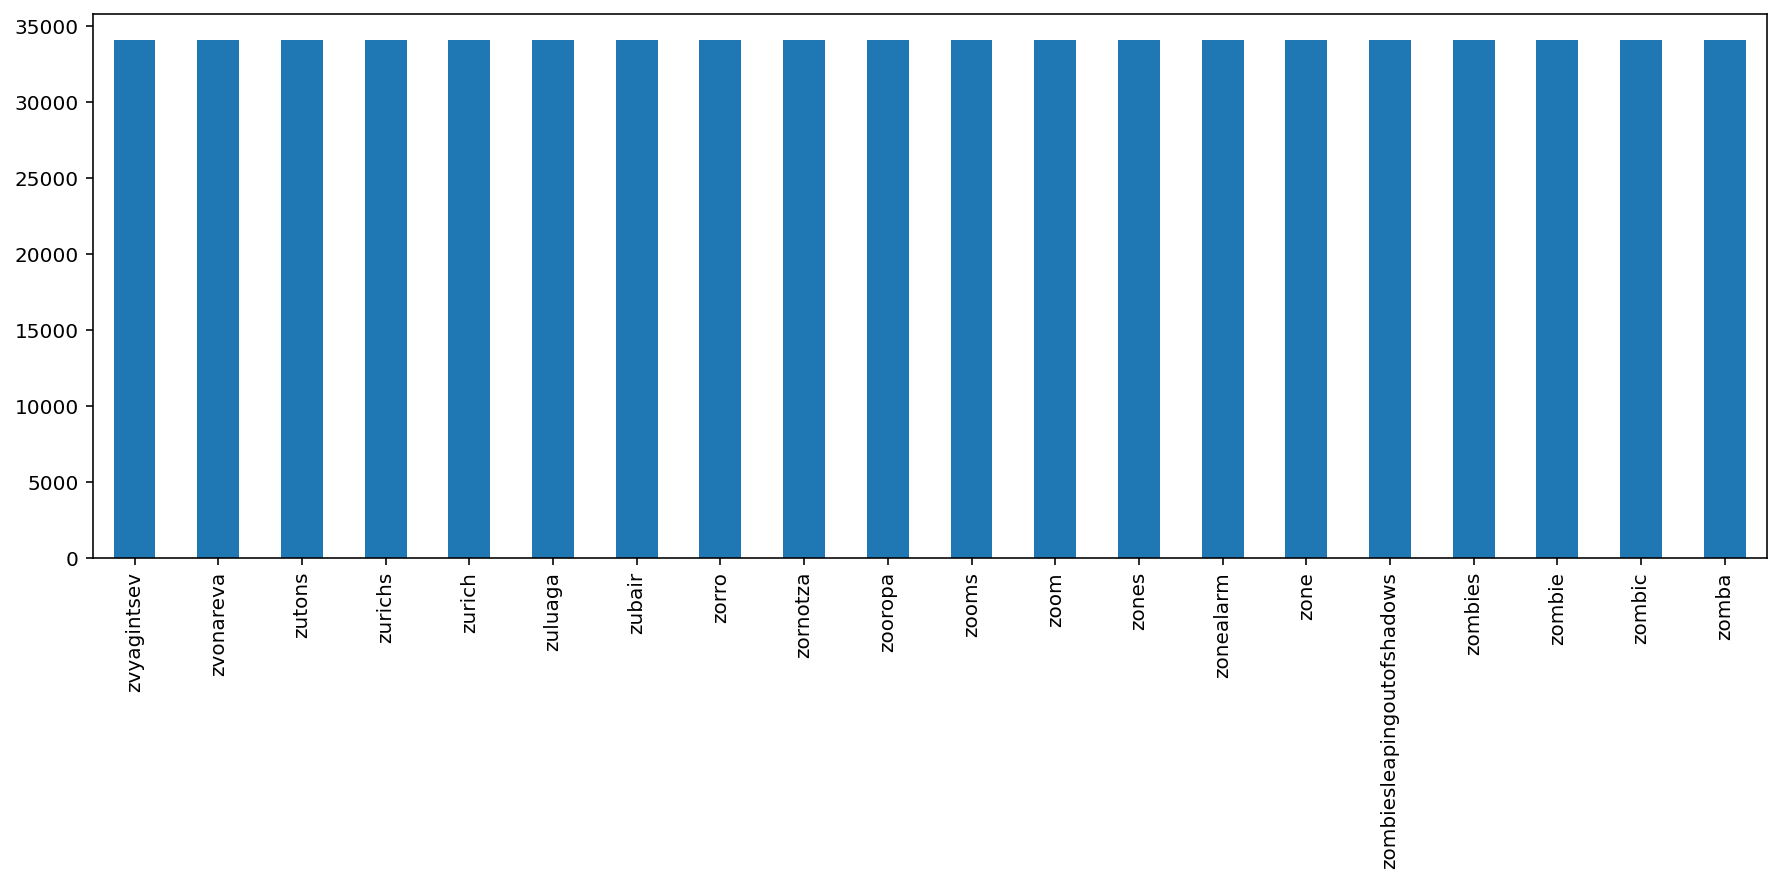

In [20]:
top_vacab = vocab_bef_stem.head(20)
top_vacab.plot(kind = 'bar', figsize=(15,5))

# **Stemming**

In [21]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [22]:
data['news'] = data['news'].apply(stemming)
data.head(10)

,Unnamed: 0,news,type,News_length
0,0,yuko unit buyer face loan claim owner embattl ...,business,1557
1,1,ad sale boost time warner profit quarter profi...,business,2569
2,2,dollar gain greenspan speech dollar hit highes...,business,2258
3,3,us trade gap hit record 2004 gap us export imp...,business,1960
4,4,high fuel price hit bas profit british airway ...,business,2411
5,5,india widen access telecom india rais limit fo...,business,1738
6,6,yuko lose us bankruptci battl judg dismiss att...,business,2717
7,7,ask jeev tip onlin ad reviv ask jeev becom thi...,business,1149
8,8,indonesian face fuel price rise indonesia gove...,business,1852
9,9,telegraph newspap axe 90 job daili sunday tele...,business,2996


In [23]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer(stop_words = 'english')

# fit the vectorizer using the text data
tfid_vectorizer.fit(data['news'])

# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

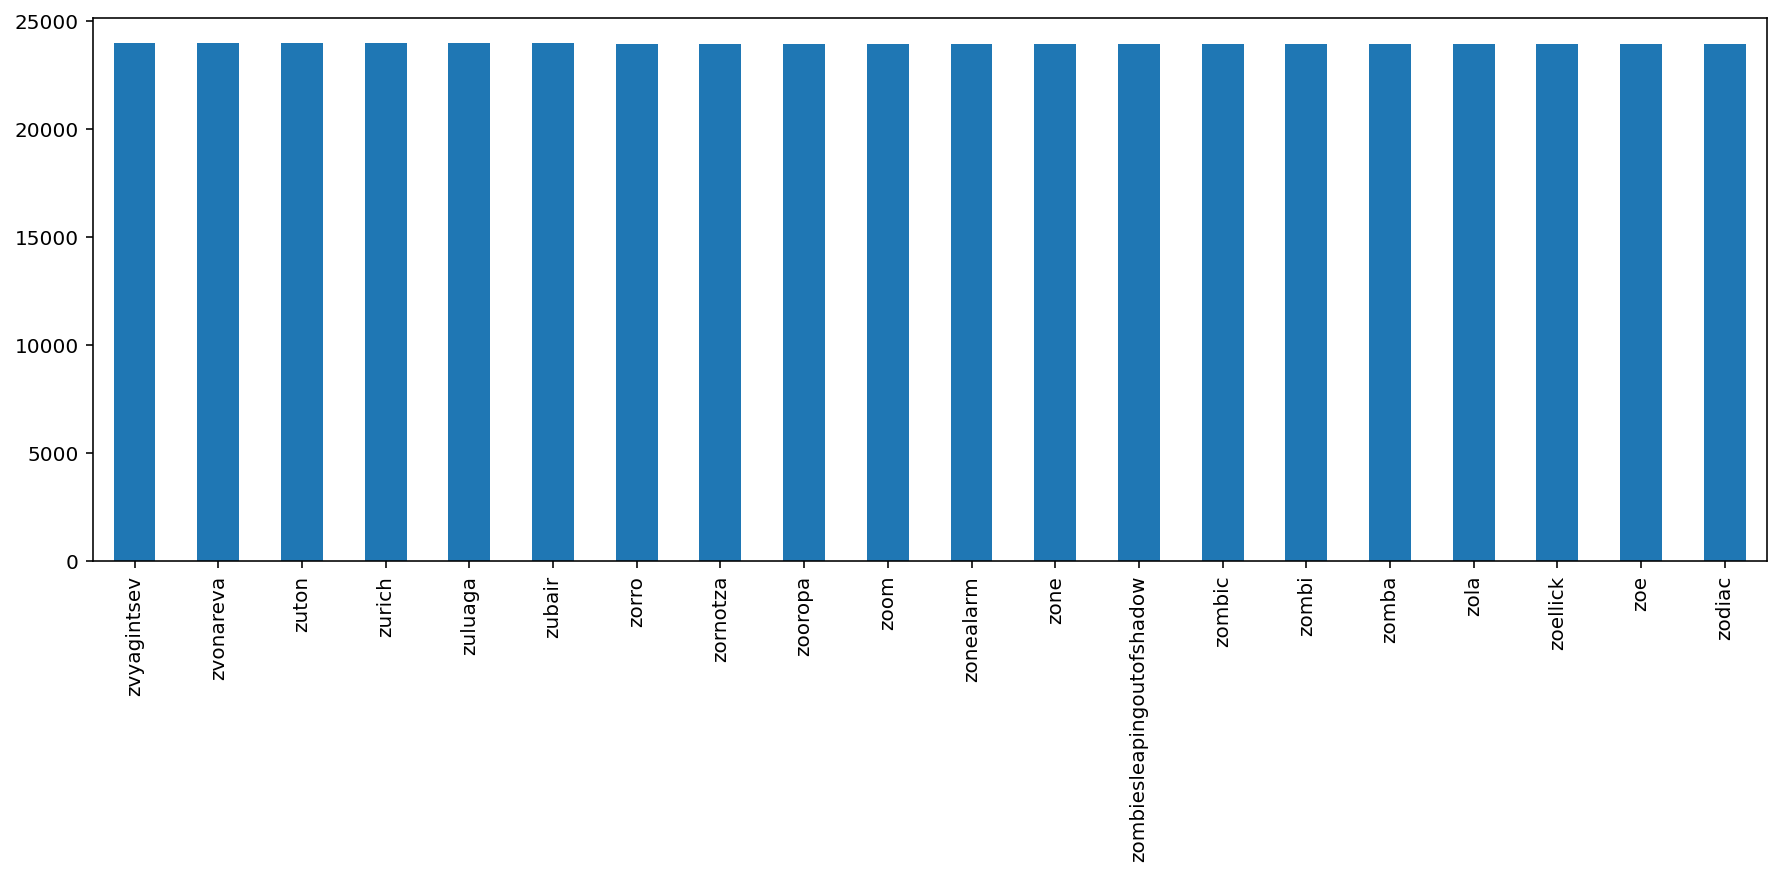

In [24]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
# plot of the top vocab
top_vacab = vocab_after_stem.head(20)
top_vacab.plot(kind = 'bar', figsize=(15,5))

In [25]:
def length(text):    
    '''a function which returns the length of text'''
    return len(text)

In [26]:
data['length'] = data['news'].apply(length)
data.head(10)

,Unnamed: 0,news,type,News_length,length
0,0,yuko unit buyer face loan claim owner embattl ...,business,1557,1005
1,1,ad sale boost time warner profit quarter profi...,business,2569,1626
2,2,dollar gain greenspan speech dollar hit highes...,business,2258,1458
3,3,us trade gap hit record 2004 gap us export imp...,business,1960,1272
4,4,high fuel price hit bas profit british airway ...,business,2411,1620
5,5,india widen access telecom india rais limit fo...,business,1738,1136
6,6,yuko lose us bankruptci battl judg dismiss att...,business,2717,1675
7,7,ask jeev tip onlin ad reviv ask jeev becom thi...,business,1149,702
8,8,indonesian face fuel price rise indonesia gove...,business,1852,1214
9,9,telegraph newspap axe 90 job daili sunday tele...,business,2996,1884


In [27]:
Business_data = data[data['type'] == 'business']
Entertainment_data = data[data['type'] == 'entertainment']
Politics_data = data[data['type'] == 'politics']
Sport_data = data[data['type'] == 'sport']
Tech_data = data[data['type'] == 'tech']

In [28]:
Business_data

,Unnamed: 0,news,type,News_length,length
0,0,yuko unit buyer face loan claim owner embattl ...,business,1557,1005
1,1,ad sale boost time warner profit quarter profi...,business,2569,1626
2,2,dollar gain greenspan speech dollar hit highes...,business,2258,1458
3,3,us trade gap hit record 2004 gap us export imp...,business,1960,1272
4,4,high fuel price hit bas profit british airway ...,business,2411,1620
...,...,...,...,...,...
505,505,china top trader japan china overtook us becom...,business,1491,989
506,506,uk economi end year spurt uk economi grew esti...,business,2850,1780
507,507,euro firm miss optim 90 larg compani around wo...,business,2631,1589
508,508,aid climat top davo agenda climat chang fight ...,business,2727,1661


# **Count of words in Business data**

In [29]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer(stop_words = 'english')

# fit the vectorizer using the text data
tfid_vectorizer.fit(Business_data['news'])

# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

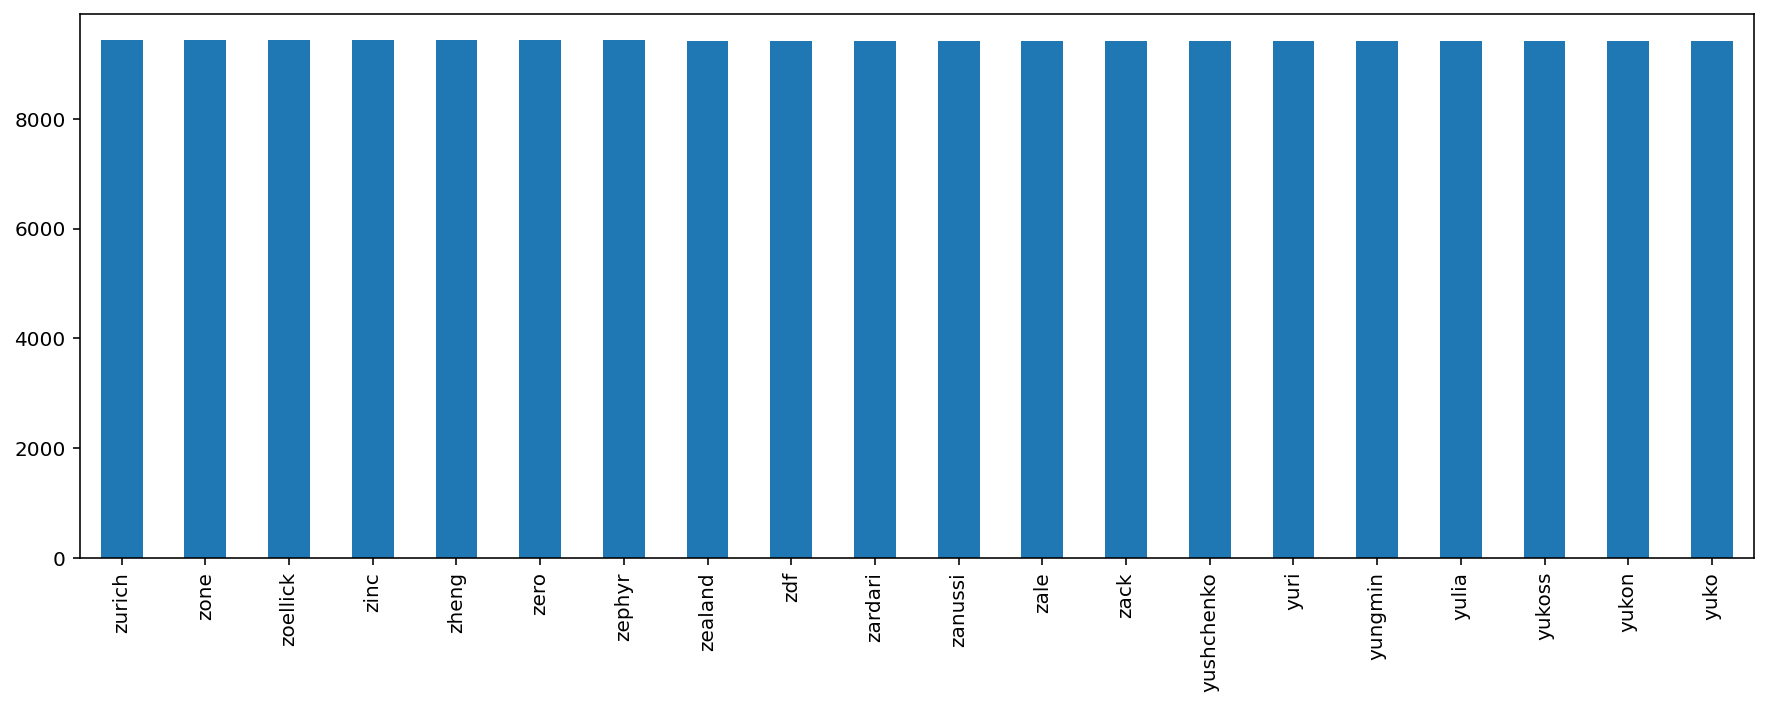

In [30]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
# plot of the top vocab
top_vacab = vocab_after_stem.head(20)
top_vacab.plot(kind = 'bar', figsize=(15,5))

# **Count of words in Politics data**


In [31]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer(stop_words = 'english')

# fit the vectorizer using the text data
tfid_vectorizer.fit(Politics_data['news'])

# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

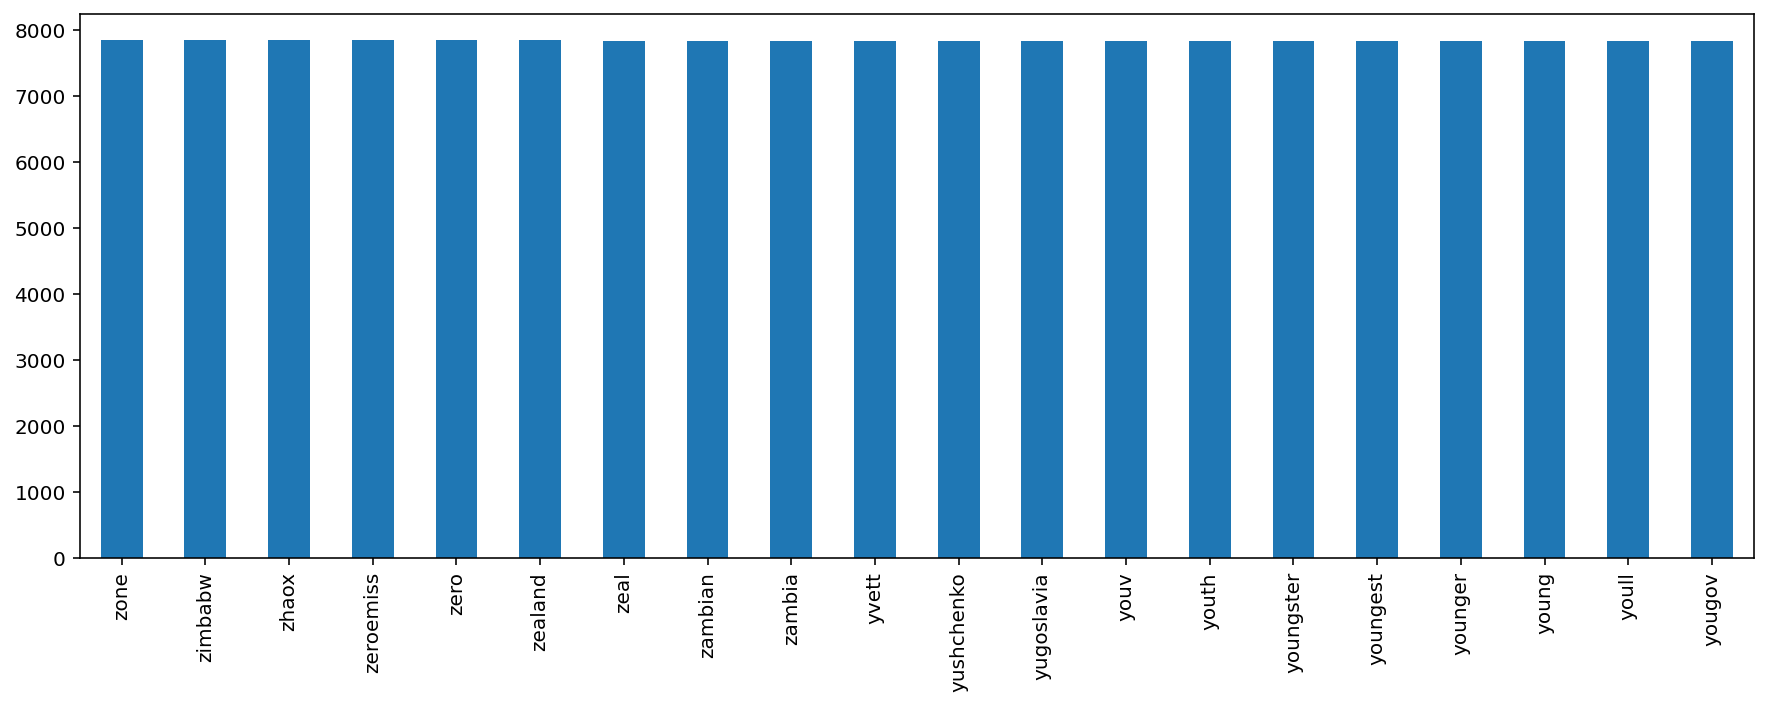

In [32]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
# plot of the top vocab
top_vacab = vocab_after_stem.head(20)
top_vacab.plot(kind = 'bar', figsize=(15,5))

# **Count of words in Sport data**

In [33]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer(stop_words = 'english')

# fit the vectorizer using the text data
tfid_vectorizer.fit(Sport_data['news'])

# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

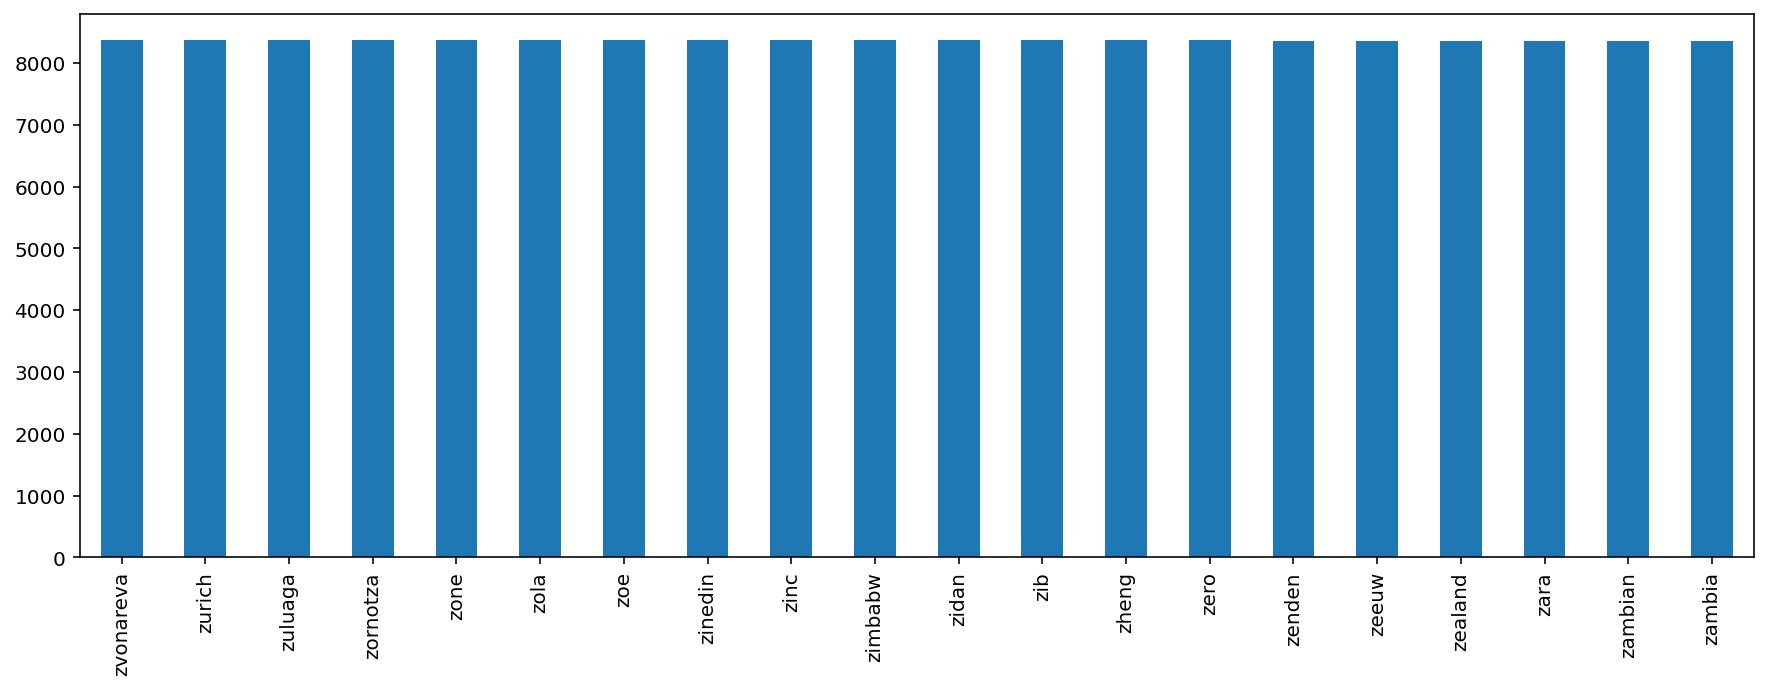

In [34]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
# plot of the top vocab
top_vacab = vocab_after_stem.head(20)
top_vacab.plot(kind = 'bar', figsize=(15,5))

# **Count of words in Tech data**

In [35]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer(stop_words = 'english')

# fit the vectorizer using the text data
tfid_vectorizer.fit(Tech_data['news'])

# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

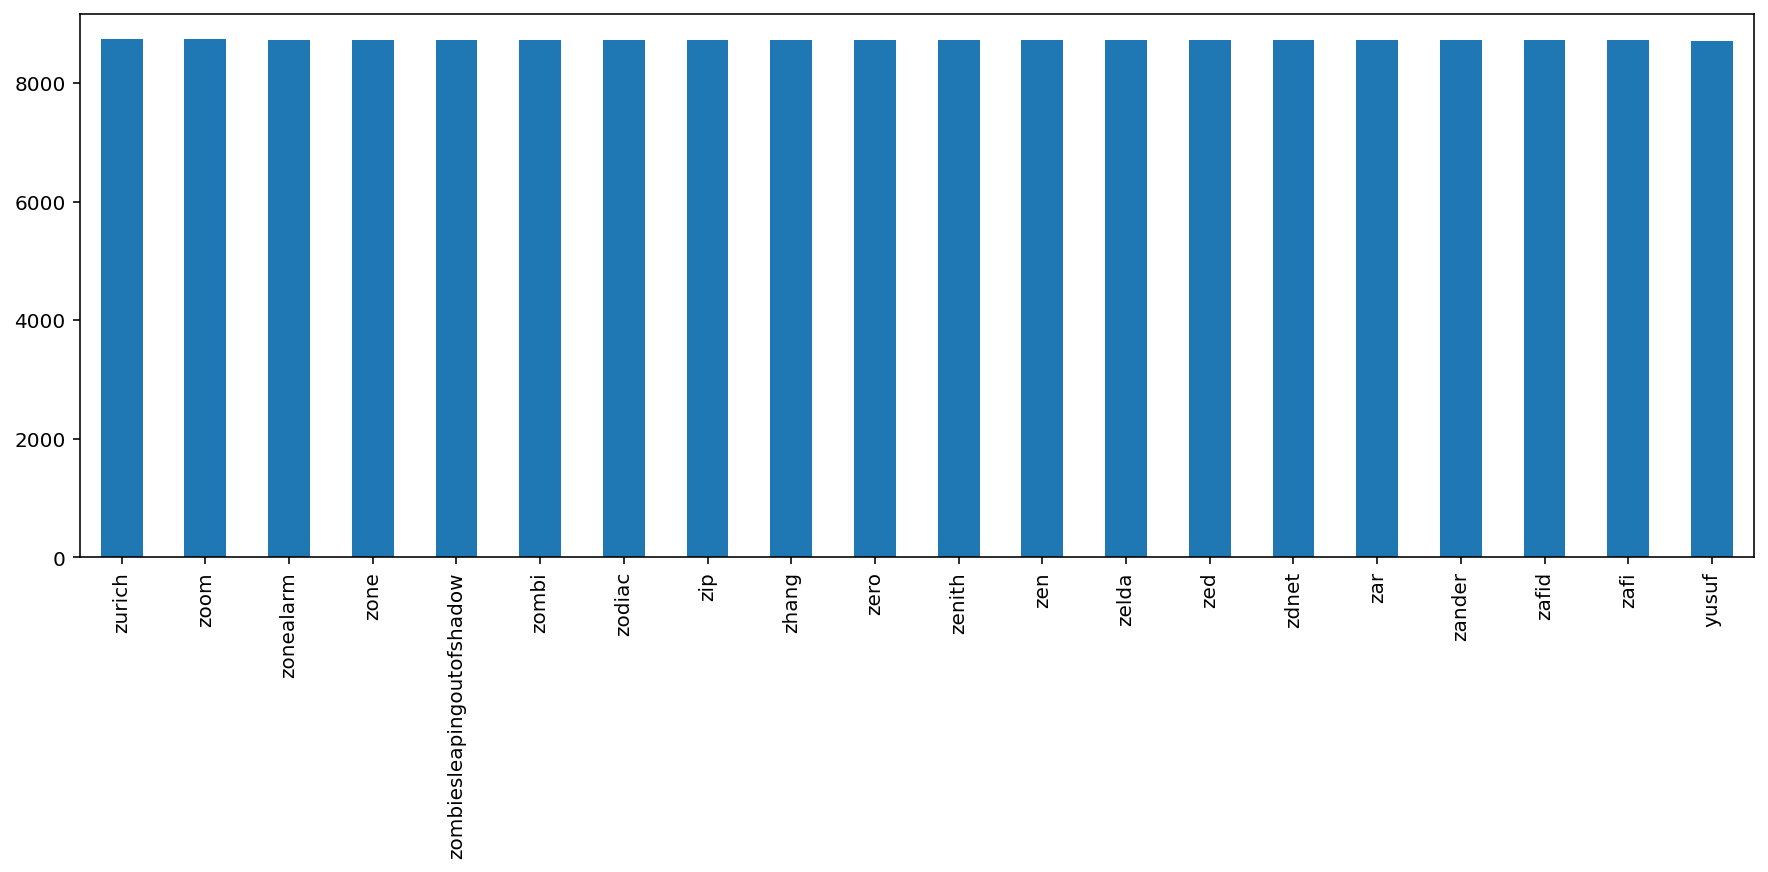

In [36]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
# plot of the top vocab
top_vacab = vocab_after_stem.head(20)
top_vacab.plot(kind = 'bar', figsize=(15,5))

# **Word Cloud**

In [37]:
from wordcloud import WordCloud ,STOPWORDS

In [38]:
def create_wordcloud(words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

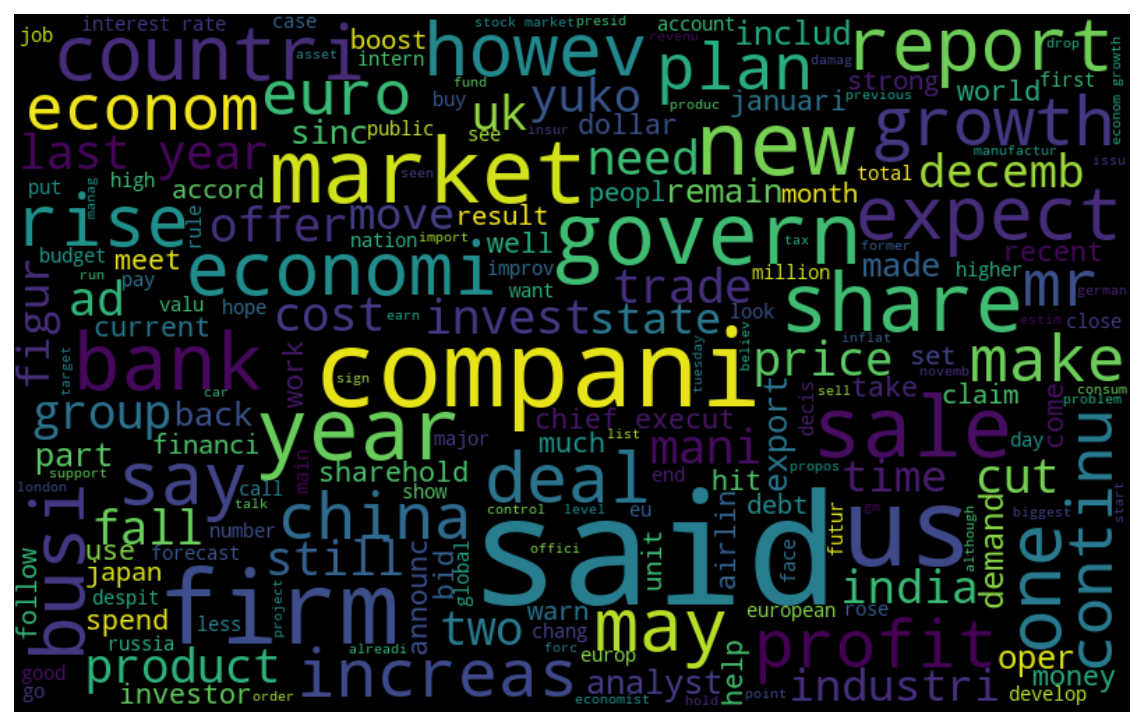

In [39]:
subset=data[data.type=="business"]
text=subset.news.values
words =" ".join(text)
create_wordcloud(words)

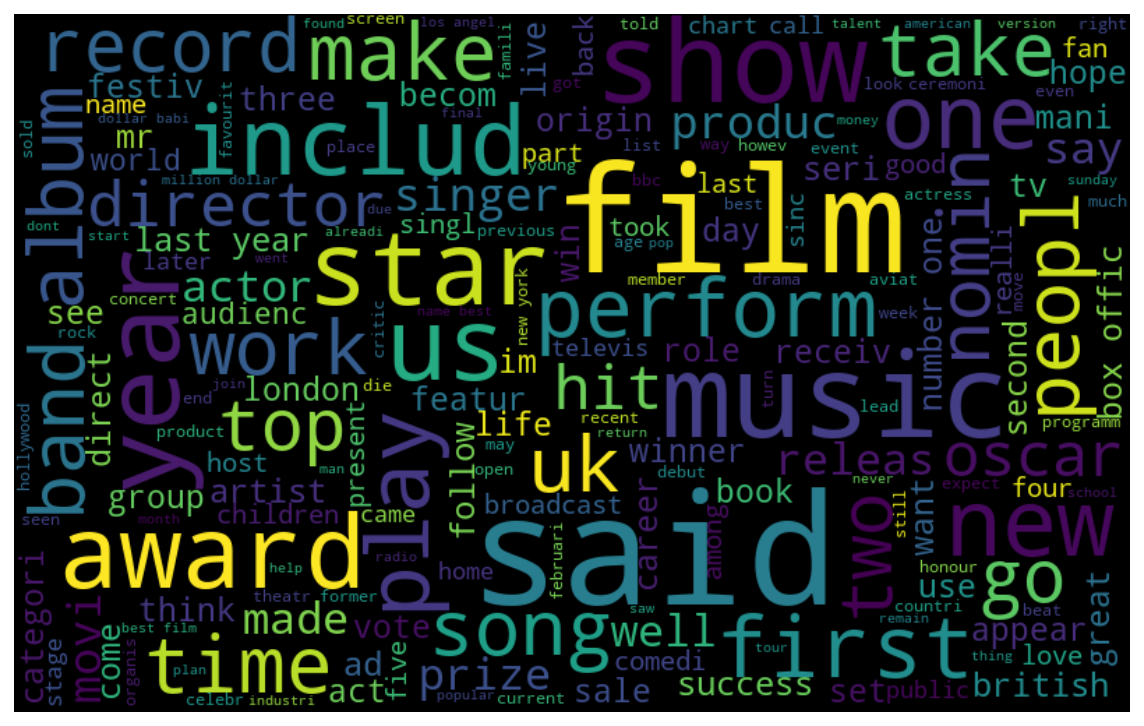

In [40]:
subset=data[data.type=="entertainment"]
text=subset.news.values
words =" ".join(text)
create_wordcloud(words)

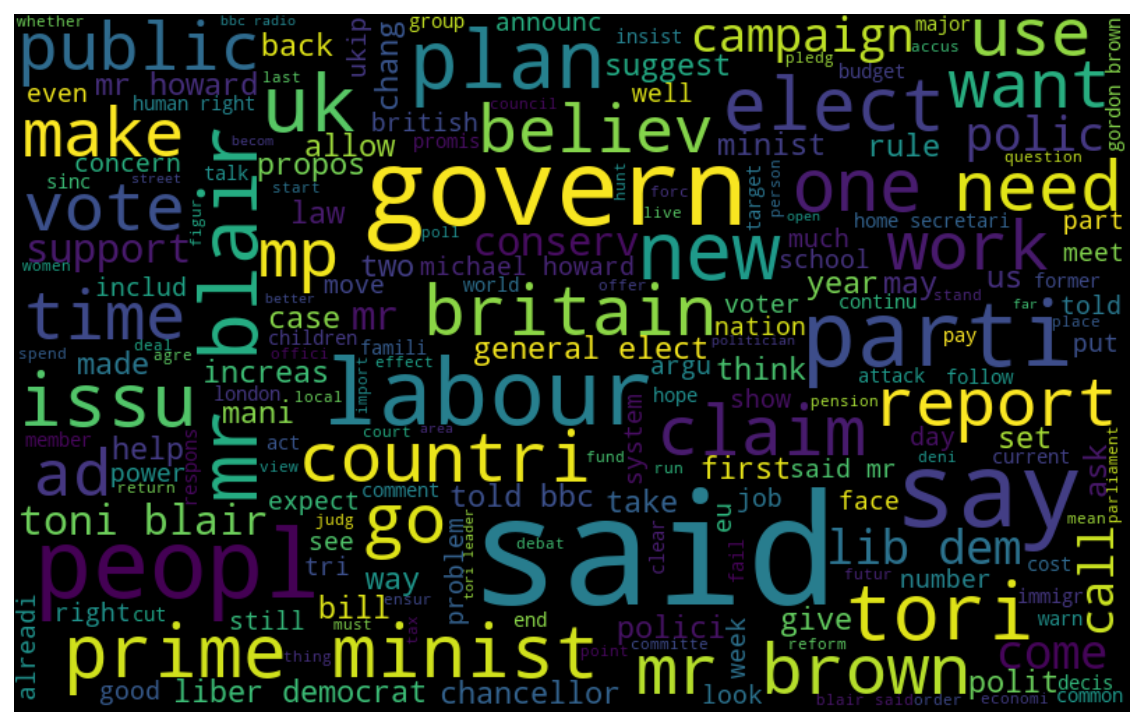

In [41]:
subset=data[data.type=="politics"]
text=subset.news.values
words =" ".join(text)
create_wordcloud(words)

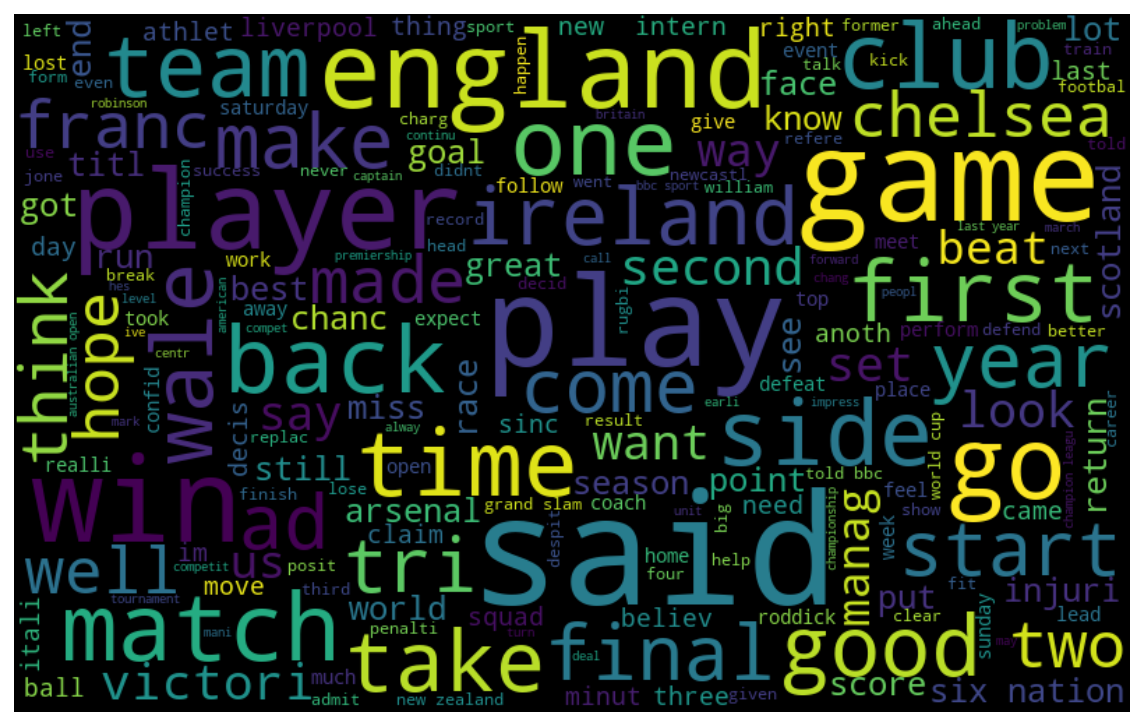

In [42]:
subset=data[data.type=="sport"]
text=subset.news.values
words =" ".join(text)
create_wordcloud(words)

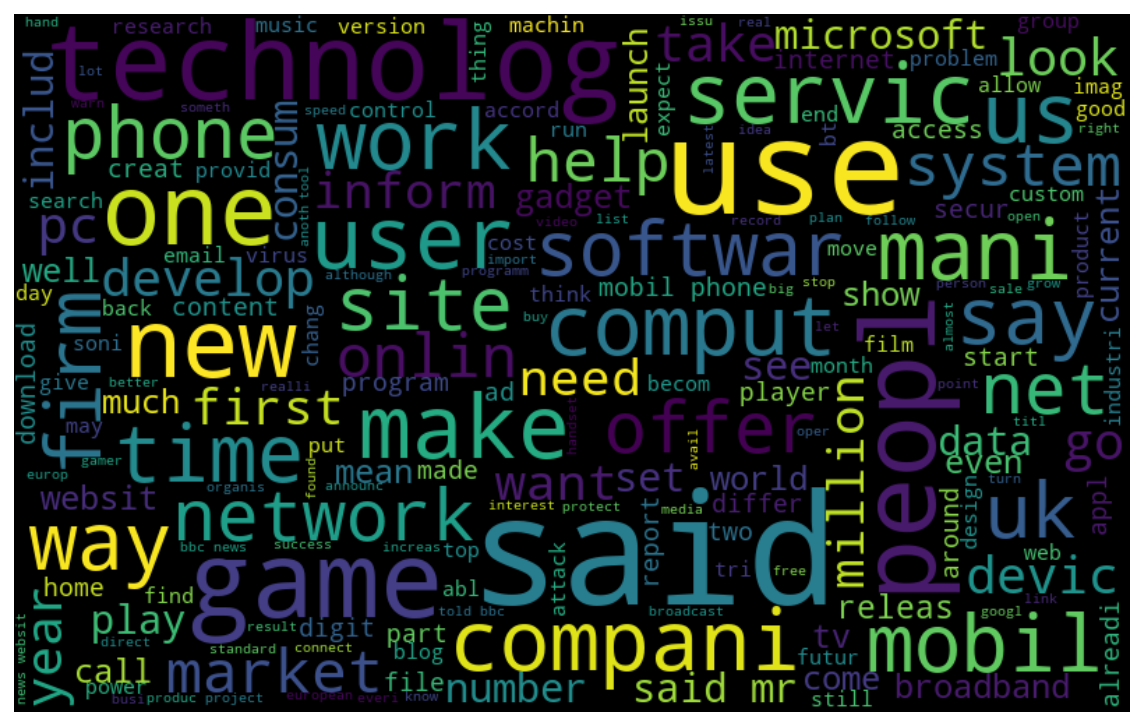

In [43]:
subset=data[data.type=="tech"]
text=subset.news.values
words =" ".join(text)
create_wordcloud(words)